# Read the data form given CSV file for analysis.

In [1]:
# The loan analysis for bank, to provide the loan to the particular person or not. after find all analysis status the bank can minimise the risk of losing money while lending to customers.
# Import the pandas lib to do the analysis with pandas.dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set the max clolumns and rows should display in out for the book.
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
%matplotlib inline


# Read the loan.csv file
raw_loan_df=pd.read_csv('loan.csv', encoding='ISO-8859-1', low_memory=False)
display(raw_loan_df)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,2

In [2]:
# Find the any columns which has no vlaues.
raw_loan_df.count()

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
                              ...  
tax_liens                     39678
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

# Data Cleaning

In [3]:
# Drop the columns which has all the values are 'NA' . because these columns anyways not going to help us on analysis.
loan_df =raw_loan_df.drop(raw_loan_df.iloc[:,53:],axis=1)

# Cleaned dataset
display(loan_df)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,...,0.0,0.0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,...,5.0,0.0,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,...,0.0,0.0,11,0,9698,19.40%,20,f,0.00,0.00,5272.161128,1397.12,5000.00,27

In [4]:
# Check any other columns doesn't have any data
loan_df.count()

id                             39717
member_id                      39717
loan_amnt                      39717
funded_amnt                    39717
funded_amnt_inv                39717
                               ...  
last_credit_pull_d             39715
collections_12_mths_ex_med     39661
mths_since_last_major_derog        0
policy_code                    39717
application_type               39717
Length: 53, dtype: int64

In [5]:
# we don't have any values in this coulum - mths_since_last_major_derog. let's drop this as well.
loan_df=loan_df.drop('mths_since_last_major_derog',axis=1)
loan_df=loan_df.drop('next_pymnt_d',axis=1)

In [6]:
# For out analysis we required only two type of custeomer records.
# 1. Fully Paind Customers - Applicant has fully paid the loan
# 2. Default Customers - Applicant has not paid the loan
# so filter the required records only

# Remove Currtent Customers
loan_df=loan_df.loc[loan_df['loan_status']!='Current']
display(loan_df)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,...,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,...,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,...,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,...,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,

In [7]:
# Checking the record counts after filter out the required records
# whole data count : 39717

loan_df.count()

# after filtering the record : 38577

id                            38577
member_id                     38577
loan_amnt                     38577
funded_amnt                   38577
funded_amnt_inv               38577
                              ...  
last_pymnt_amnt               38577
last_credit_pull_d            38575
collections_12_mths_ex_med    38521
policy_code                   38577
application_type              38577
Length: 51, dtype: int64

In [8]:
# Backup the cleaned and original dataset before deriving columns or changing the values in it.

loan_df_bkp=loan_df.copy()

# if anything goes wrong in our currently working dataset, we can retrive the records from it. so we don't want to go and run form initial stage 

# Data analyze and visualization

<AxesSubplot:title={'center':'Loan - Fully paid customer & Default customers'}, xlabel='loan_status'>

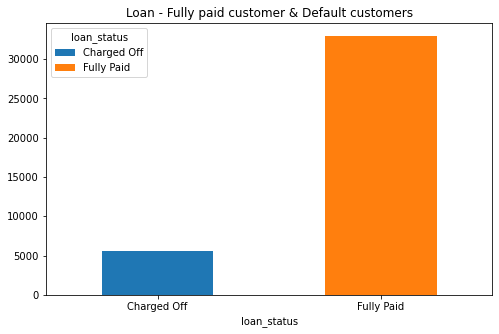

In [9]:
# Lets take the loan status to diffent dataset and analysis the how many defaulter and how many fully paid customer in this data set
df_loan_status=loan_df[['loan_status']]
df_loan_status=df_loan_status.groupby('loan_status')['loan_status'].value_counts().sort_index()
df_loan_status.unstack().plot(kind='bar',rot=0,stacked=True,figsize=(8,5),title='Loan - Fully paid customer & Default customers')

In [10]:
# chagne the value of loan status to 0 and 1 for better analysis
# 0 - Fully paid customer
# 1 - Defaulter
loan_df=loan_df.replace(to_replace =["Fully Paid","Charged Off"], value =[0,1]) 

In [11]:
loan_df.loan_status.value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [12]:
# separate the two type of customers in to different data for better understanding and better analysis
default_loan_df=loan_df.loc[loan_df['loan_status']==1]
fully_paid_loan_df=loan_df.loc[loan_df['loan_status']==0]

# Analysis based on Customer grade 

<AxesSubplot:title={'center':'Grade of the Loan Applicant'}, xlabel='grade'>

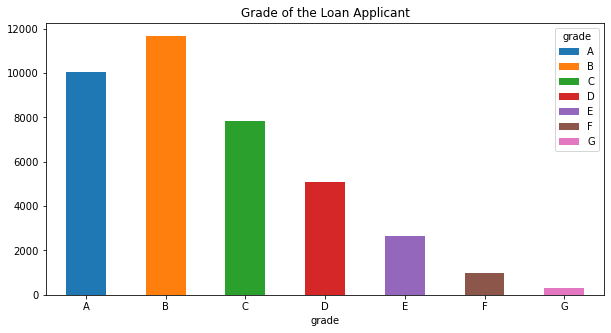

In [13]:
# find out all the customer grade, which grade has maximum no of customer

df_grade=loan_df[['grade']]
df_grade=df_grade.groupby('grade')['grade'].value_counts()
df_grade.unstack().plot(kind='bar',stacked=True,rot=0,figsize=(10,5),title='Grade of the Loan Applicant')

grade  grade
A      A        28.66
B      B        31.11
C      C        19.69
D      D        12.04
E      E         5.91
F      F         1.99
G      G         0.60
Name: grade, dtype: float64

<AxesSubplot:title={'center':'Grade of Fullypaid applicants'}, xlabel='grade'>

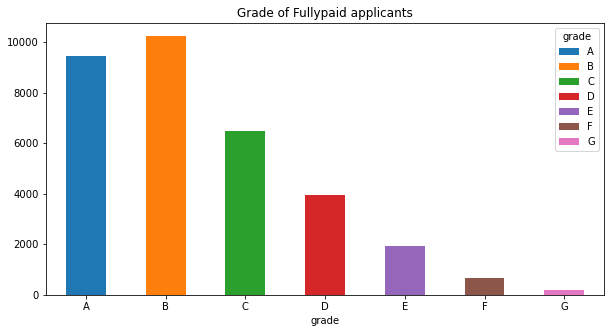

In [14]:
# Find out the grade of fully paid customers

fully_paid_df_grade=fully_paid_loan_df[['grade']]
fully_paid_df_grade=fully_paid_df_grade.groupby('grade')['grade'].value_counts()
display(round((fully_paid_df_grade/len(fully_paid_loan_df))*100,2))
fully_paid_df_grade.unstack().plot(kind='bar',rot=0,stacked=True,figsize=(10,5),title='Grade of Fullypaid applicants')

grade  grade
A      A        10.70
B      B        25.32
C      C        23.94
D      D        19.87
E      E        12.71
F      F         5.67
G      G         1.79
Name: grade, dtype: float64

<AxesSubplot:title={'center':'Grade of dafaulter applicants'}, xlabel='grade'>

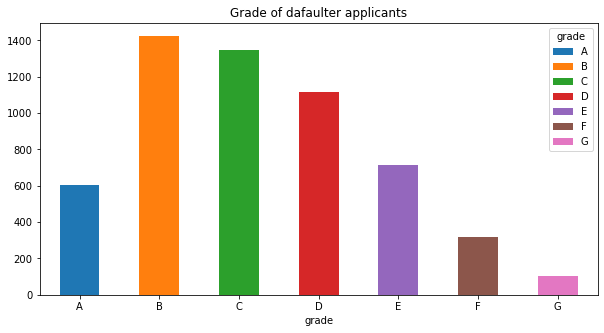

In [15]:
#Find out the grade of Default customer

default_df_grade=default_loan_df[['grade']]
default_df_grade=default_df_grade.groupby('grade')['grade'].value_counts()
display(round((default_df_grade/len(default_loan_df))*100,2))
default_df_grade.unstack().plot(kind='bar',rot=0,stacked=True,figsize=(10,5),title='Grade of dafaulter applicants')

# Analysis based on loan period opted by the customer

 36 months    75.42
 60 months    24.58
Name: term, dtype: float64

<AxesSubplot:title={'center':'Terms of all the applicants'}>

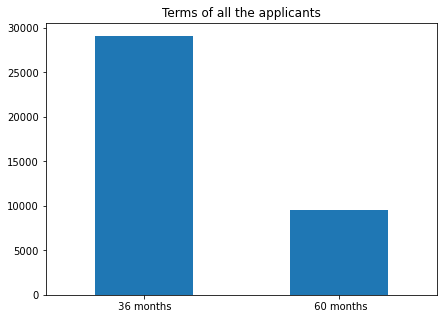

In [16]:
# Analysis based on Tems and percentage of terms
loan_df_terms=loan_df['term']
loan_df_terms=loan_df_terms.value_counts()
display(round((loan_df_terms/len(loan_df))*100,2))
loan_df_terms.plot(kind='bar',rot=0,stacked=True,figsize=(7,5),title='Terms of all the applicants')

 36 months    78.51
 60 months    21.49
Name: term, dtype: float64

<AxesSubplot:title={'center':'Tenture of fully paid applicants'}>

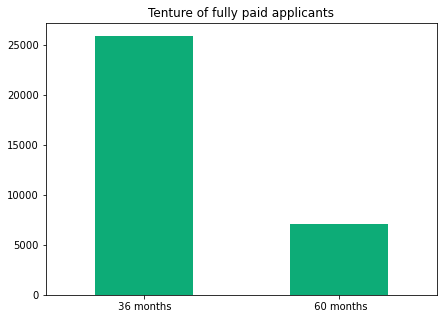

In [17]:
# Terms opted by fully paid customers percentage
fully_paid_loan_df_terms=fully_paid_loan_df['term']
fully_paid_loan_df_terms=fully_paid_loan_df_terms.value_counts()
display(round((fully_paid_loan_df_terms/len(fully_paid_loan_df))*100,2))
fully_paid_loan_df_terms.plot(kind='bar',rot=0,stacked=True,figsize=(7,5),title='Tenture of fully paid applicants',color="#0DAC77")

 36 months    57.35
 60 months    42.65
Name: term, dtype: float64

<AxesSubplot:title={'center':'Tenture of defaulter'}>

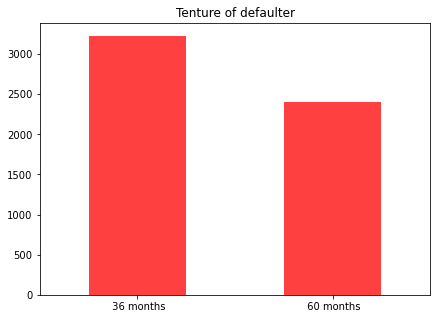

In [18]:
# Terms opted by default customers percentage
default_loan_df_terms=default_loan_df['term']
default_loan_df_terms=default_loan_df_terms.value_counts()
display(round((default_loan_df_terms/len(default_loan_df))*100,2))
default_loan_df_terms.plot(kind='bar',rot=0,stacked=True,figsize=(7,5),title='Tenture of defaulter',color="#FF4040")

# Analysis based on house hold by customer

RENT        48.0
MORTGAGE    44.0
OWN          8.0
OTHER        0.0
NONE         0.0
Name: home_ownership, dtype: float64

<AxesSubplot:title={'center':'House owner of  applicants'}>

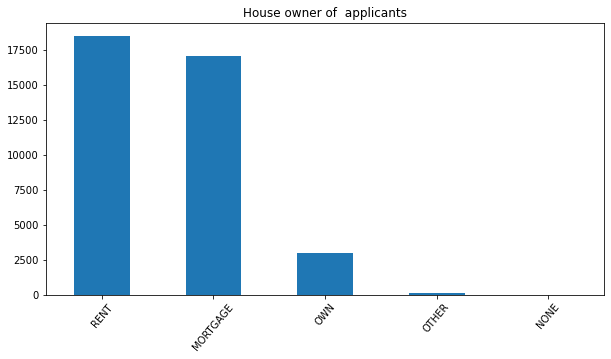

In [19]:
# Analyze the house hold of customers
home_ownership_loan_df=loan_df['home_ownership']
home_ownership_loan_df=home_ownership_loan_df.value_counts()
display(round((home_ownership_loan_df/len(loan_df))*100))
home_ownership_loan_df.plot(kind='bar',rot=50,stacked=True,figsize=(10,5),title='House owner of  applicants')

RENT        47.0
MORTGAGE    45.0
OWN          8.0
OTHER        0.0
NONE         0.0
Name: home_ownership, dtype: float64

<AxesSubplot:title={'center':'House owner of  applicants'}>

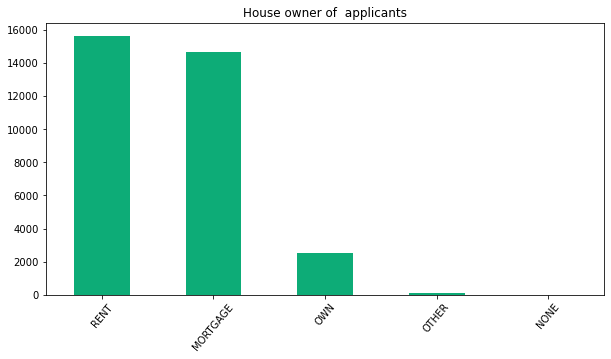

In [20]:
# house hold by fully paid customers
home_ownership_fully_paid_loan_df=fully_paid_loan_df['home_ownership']
home_ownership_fully_paid_loan_df=home_ownership_fully_paid_loan_df.value_counts()
display(round((home_ownership_fully_paid_loan_df/len(fully_paid_loan_df))*100))
home_ownership_fully_paid_loan_df.plot(kind='bar',rot=50,stacked=True,figsize=(10,5),title='House owner of  applicants',color="#0DAC77")

RENT        50.0
MORTGAGE    41.0
OWN          8.0
OTHER        0.0
Name: home_ownership, dtype: float64

<AxesSubplot:title={'center':'House owner of  dafaulters'}>

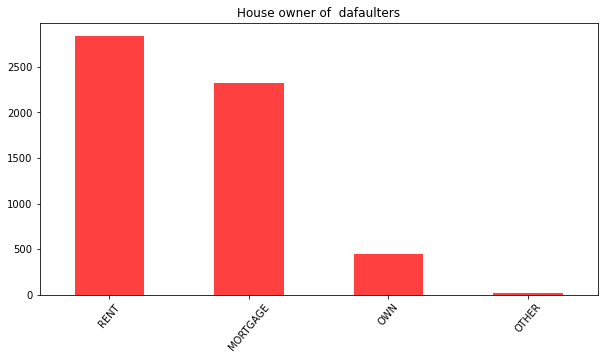

In [21]:
# house hold by fully default customers
home_ownership_default_loan_df=default_loan_df['home_ownership']
home_ownership_default_loan_df=home_ownership_default_loan_df.value_counts()
display(round((home_ownership_default_loan_df/len(default_loan_df))*100))
home_ownership_default_loan_df.plot(kind='bar',rot=50,stacked=True,figsize=(10,5),title='House owner of  dafaulters',color="#FF4040")

# Analysis based on customer employment duration

In [22]:
# Derive the data from the exising columns for the better analysis
loan_df['emp_length']=loan_df.emp_length.str.strip('+,years,<,>')
loan_df['emp_length']=loan_df.emp_length.str[0:2]
loan_df['emp_length']=loan_df.emp_length.fillna(0)

C:\Users\579211\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='emp_length'>

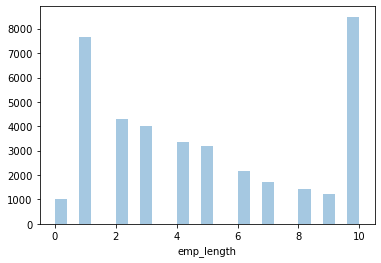

In [23]:
sns.distplot(loan_df.emp_length,kde=False)

<AxesSubplot:title={'center':'Employment Length of all customers'}>

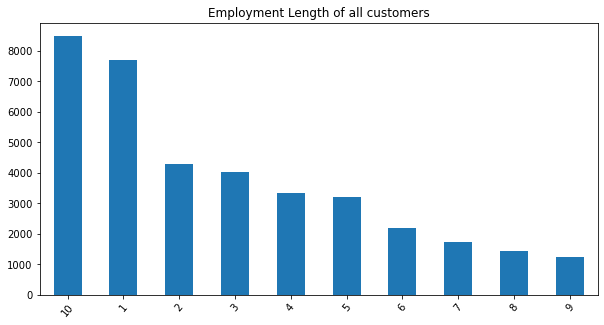

In [24]:
loan_emp_len_df=loan_df['emp_length'].str.strip()
loan_emp_len_df=loan_emp_len_df.value_counts()
loan_emp_len_df.plot(kind='bar',rot=50,figsize=(10,5),title='Employment Length of all customers')

Percentage of Default customers :  84.0


<AxesSubplot:title={'center':'Employment Length of Fully paid customers'}>

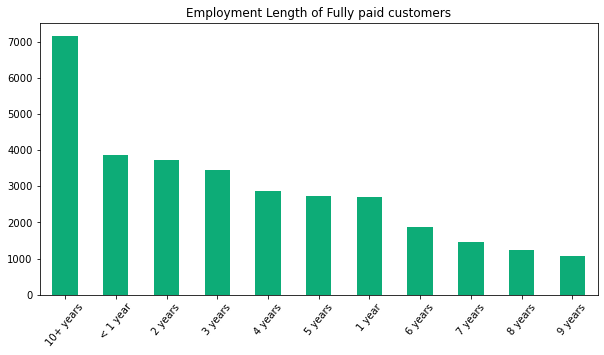

In [25]:
fully_paid_loan_emp_len_df=fully_paid_loan_df['emp_length'].str.strip()
fully_paid_loan_emp_len_df=fully_paid_loan_emp_len_df.value_counts()
print("Percentage of Default customers : ",round((fully_paid_loan_emp_len_df/len(loan_df))*100).sum())
fully_paid_loan_emp_len_df.plot(kind='bar',rot=50,figsize=(10,5),title='Employment Length of Fully paid customers',color="#0DAC77")

Percentage of Default customers :  13.0


<AxesSubplot:title={'center':'Employment Length of default customers'}>

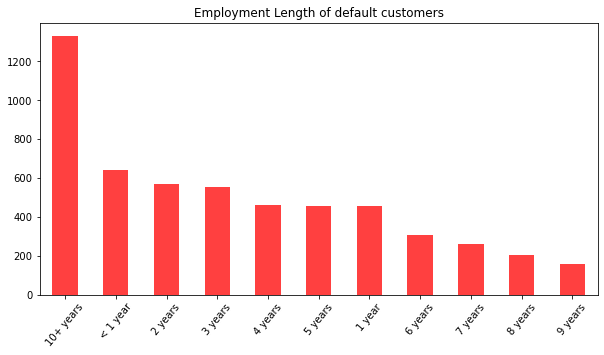

In [26]:
default_loan_emp_len_df=default_loan_df['emp_length'].str.strip()
default_loan_emp_len_df=default_loan_emp_len_df.value_counts()
print("Percentage of Default customers : ",round((default_loan_emp_len_df/len(loan_df))*100).sum())
default_loan_emp_len_df.plot(kind='bar',rot=50,figsize=(10,5),title='Employment Length of default customers',color="#FF4040")

# Analysis based on loan proviede on particular period

<AxesSubplot:title={'center':'Loan issue month for  all the customers'}>

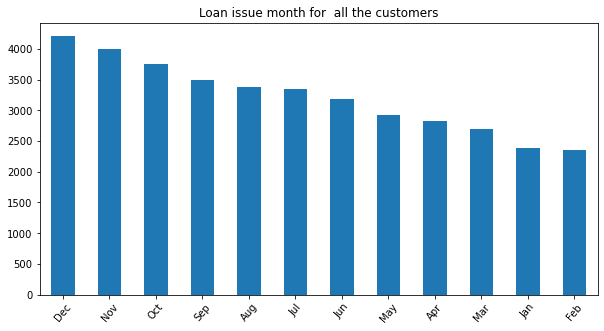

In [27]:
loan_issue_month_df=loan_df['issue_d'].str[0:3].str.strip()
loan_issue_month_df=loan_issue_month_df.value_counts()
loan_issue_month_df.plot(kind='bar',rot=50,figsize=(10,5),title='Loan issue month for  all the customers')

<AxesSubplot:title={'center':'Loan issue month for Fully paid customers'}>

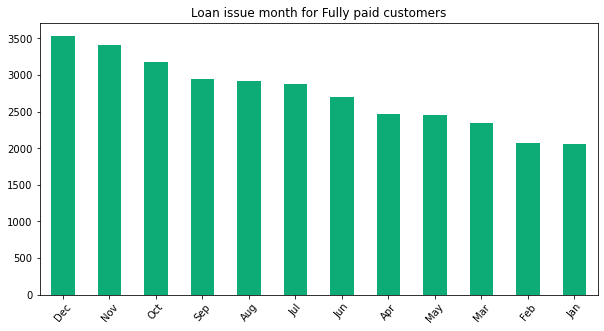

In [28]:
fully_paid_loan_issue_month_df=fully_paid_loan_df['issue_d'].str[0:3].str.strip()
fully_paid_loan_issue_month_df=fully_paid_loan_issue_month_df.value_counts()
fully_paid_loan_issue_month_df.plot(kind='bar',rot=50,figsize=(10,5),title='Loan issue month for Fully paid customers',color="#0DAC77")

<AxesSubplot:title={'center':'Loan issue month for default customers'}>

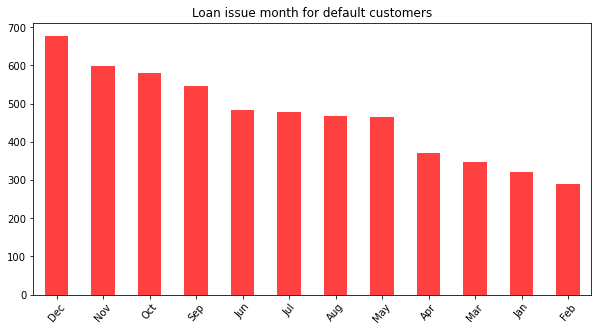

In [29]:
default_loan_issue_month_df=default_loan_df['issue_d'].str[0:3].str.strip()
default_loan_issue_month_df=default_loan_issue_month_df.value_counts()
default_loan_issue_month_df.plot(kind='bar',rot=50,figsize=(10,5),title='Loan issue month for default customers',color="#FF4040")

<AxesSubplot:title={'center':'Loan issue year for  all the customers'}>

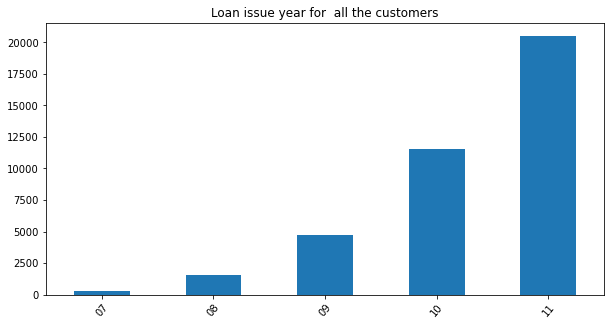

In [30]:
loan_issue_year_df=loan_df['issue_d'].str[-2:].astype(str)
loan_issue_year_df=loan_issue_year_df.value_counts().sort_index()
loan_issue_year_df.plot(kind='bar',rot=50,figsize=(10,5),title='Loan issue year for  all the customers')

<AxesSubplot:title={'center':'Loan issue year for  all the customers'}>

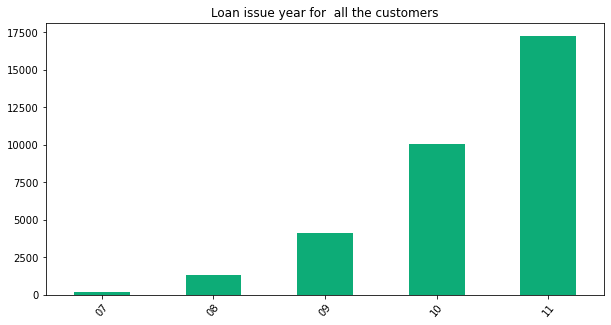

In [31]:
fully_paid_year_df=fully_paid_loan_df['issue_d'].str[-2:].astype(str)
fully_paid_year_df=fully_paid_year_df.value_counts().sort_index()
fully_paid_year_df.plot(kind='bar',rot=50,figsize=(10,5),title='Loan issue year for  all the customers',color="#0DAC77")

<AxesSubplot:title={'center':'Loan issue year for  all the customers'}>

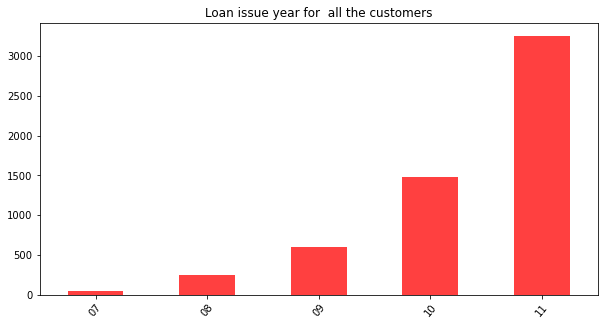

In [32]:
default_year_df=default_loan_df['issue_d'].str[-2:].astype(str)
default_year_df=default_year_df.value_counts().sort_index()
default_year_df.plot(kind='bar',rot=50,figsize=(10,5),title='Loan issue year for  all the customers',color="#FF4040")

# Analysis based on purpose of the loan

<AxesSubplot:title={'center':'purpose of the loan required for the customers'}>

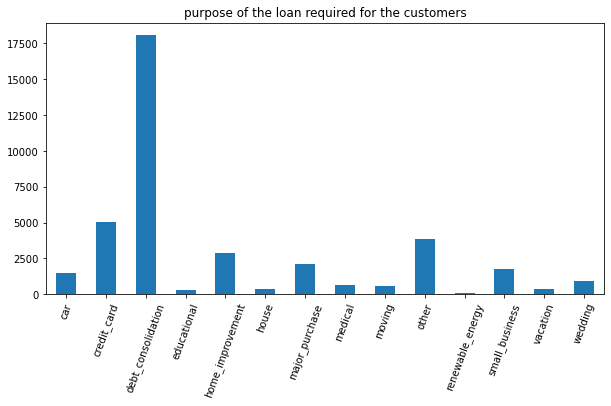

In [33]:
loan_issue_purpose_df=loan_df['purpose']
loan_issue_purpose_df=loan_issue_purpose_df.value_counts().sort_index()
loan_issue_purpose_df.plot(kind='bar',rot=70,figsize=(10,5),title='purpose of the loan required for the customers')

debt_consolidation    49.17
other                 11.25
credit_card            9.63
small_business         8.44
home_improvement       6.17
major_purchase         3.95
car                    2.84
medical                1.88
wedding                1.71
moving                 1.63
house                  1.05
educational            1.00
vacation               0.94
renewable_energy       0.34
Name: purpose, dtype: float64

<AxesSubplot:title={'center':'purpose of the loan required for the customers'}>

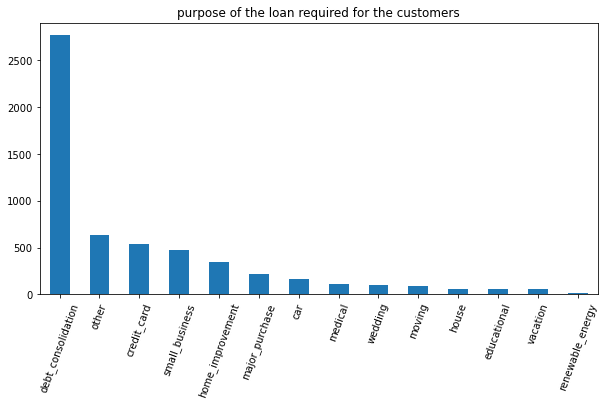

In [34]:
default_purpose_df=default_loan_df['purpose']
default_purpose_df=default_purpose_df.value_counts()
display(round((default_purpose_df/len(default_loan_df))*100,2))
default_purpose_df.plot(kind='bar',rot=70,figsize=(10,5),title='purpose of the loan required for the customers')

# Annual income for the customer

C:\Users\579211\AppData\Local\Temp\ipykernel_25176\319974418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_issue_annual_inc_df['counts_of_cus']=loan_issue_annual_inc_df['annual_inc'].value_counts()


<AxesSubplot:title={'center':'Annual incomes of the customers'}, xlabel='annual_inc', ylabel='counts_of_cus'>

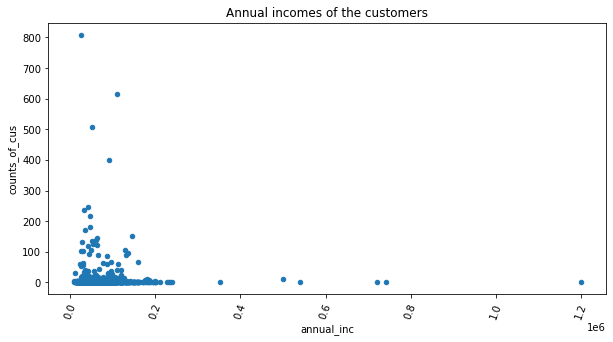

In [35]:
loan_issue_annual_inc_df=loan_df[['annual_inc']]
loan_issue_annual_inc_df['counts_of_cus']=loan_issue_annual_inc_df['annual_inc'].value_counts()
loan_issue_annual_inc_df.plot(kind='scatter',rot=70,x='annual_inc',y='counts_of_cus',figsize=(10,5),title='Annual incomes of the customers')

C:\Users\579211\AppData\Local\Temp\ipykernel_25176\456870519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_annual_inc_df['counts_of_cus']=default_annual_inc_df['annual_inc'].value_counts()


<AxesSubplot:title={'center':'Annual incomes of the customers'}, xlabel='annual_inc', ylabel='counts_of_cus'>

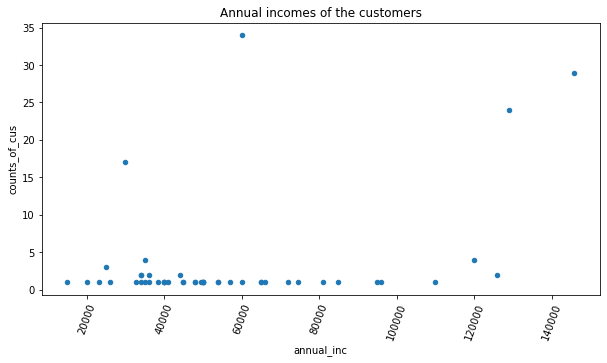

In [36]:
default_annual_inc_df=default_loan_df[['annual_inc']]
default_annual_inc_df['counts_of_cus']=default_annual_inc_df['annual_inc'].value_counts()
default_annual_inc_df.plot(kind='scatter',x='annual_inc',y='counts_of_cus',rot=70,figsize=(10,5),title='Annual incomes of the customers')

# Correlation Analysis

In [37]:
loan_corr_df=loan_df[['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','emp_length','last_pymnt_amnt']]
loan_corr_df['int_rate']=loan_corr_df['int_rate'].str.replace('%','').astype(float)
loan_corr_df['emp_length']=loan_corr_df['emp_length'].astype(int)
display(loan_corr_df)
loan_corr_df.corr()

C:\Users\579211\AppData\Local\Temp\ipykernel_25176\2525078632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_corr_df['int_rate']=loan_corr_df['int_rate'].str.replace('%','').astype(float)
C:\Users\579211\AppData\Local\Temp\ipykernel_25176\2525078632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_corr_df['emp_length']=loan_corr_df['emp_length'].astype(int)


,loan_amnt,funded_amnt,funded_amnt_inv,installment,int_rate,emp_length,last_pymnt_amnt
0,5000,5000,4975.0,162.87,10.65,10,171.62
1,2500,2500,2500.0,59.83,15.27,1,119.66
2,2400,2400,2400.0,84.33,15.96,10,649.91
3,10000,10000,10000.0,339.31,13.49,10,357.48
5,5000,5000,5000.0,156.46,7.90,3,161.03
...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,78.42,8.07,4,80.90
39713,8500,8500,875.0,275.38,10.28,3,281.94
39714,5000,5000,1325.0,156.84,8.07,1,0.00
39715,5000,5000,650.0,155.38,7.43,1,0.00


,loan_amnt,funded_amnt,funded_amnt_inv,installment,int_rate,emp_length,last_pymnt_amnt
loan_amnt,1.000000,0.981790,0.937922,0.932260,0.301265,0.156259,0.474614
funded_amnt,0.981790,1.000000,0.956172,0.958035,0.304930,0.155893,0.478448
funded_amnt_inv,0.937922,0.956172,1.000000,0.905464,0.297473,0.164291,0.469166
installment,0.932260,0.958035,0.905464,1.000000,0.277203,0.131151,0.413588
int_rate,0.301265,0.304930,0.297473,0.277203,1.000000,0.011440,0.174377
emp_length,0.156259,0.155893,0.164291,0.131151,0.011440,1.000000,0.087809
last_pymnt_amnt,0.474614,0.478448,0.469166,0.413588,0.174377,0.087809,1.000000


<AxesSubplot:>

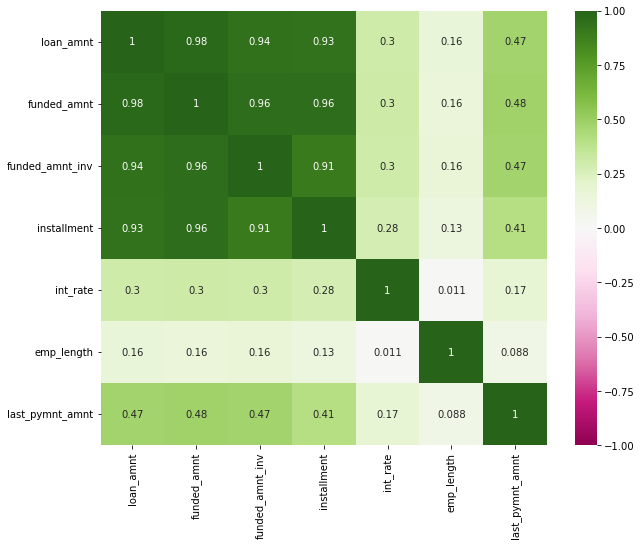

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(loan_corr_df.corr(),vmin=-1,cmap='PiYG',annot=True)

In [39]:
loan_corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        38577 non-null  int64  
 1   funded_amnt      38577 non-null  int64  
 2   funded_amnt_inv  38577 non-null  float64
 3   installment      38577 non-null  float64
 4   int_rate         38577 non-null  float64
 5   emp_length       38577 non-null  int32  
 6   last_pymnt_amnt  38577 non-null  float64
dtypes: float64(4), int32(1), int64(2)
memory usage: 2.2 MB


C:\Users\579211\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'credit_card'),
 Text(1, 0, 'car'),
 Text(2, 0, 'small_business'),
 Text(3, 0, 'other'),
 Text(4, 0, 'wedding'),
 Text(5, 0, 'debt_consolidation'),
 Text(6, 0, 'home_improvement'),
 Text(7, 0, 'major_purchase'),
 Text(8, 0, 'medical'),
 Text(9, 0, 'moving'),
 Text(10, 0, 'vacation'),
 Text(11, 0, 'house'),
 Text(12, 0, 'renewable_energy'),
 Text(13, 0, 'educational')]

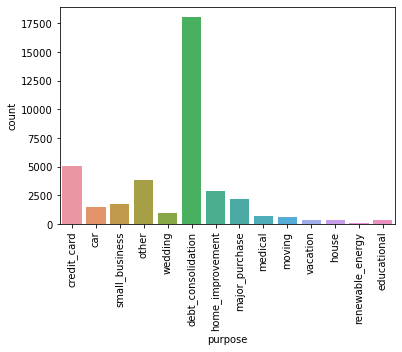

In [40]:
chart=sns.countplot(loan_df['purpose']);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

C:\Users\579211\AppData\Local\Temp\ipykernel_25176\1611044134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_two['issue_d']=loan_df_two['issue_d'].str[-2:].astype(str)


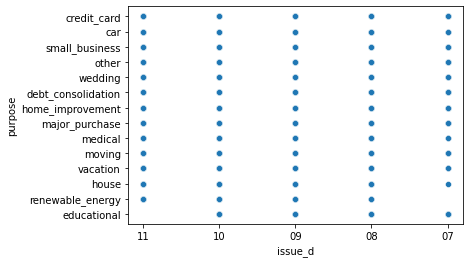

In [41]:
loan_df_two=loan_df[['purpose','issue_d']]
#loan_df_two['issue_d']=loan_df_two['issue_d'].str[0:3].str.strip()
loan_df_two['issue_d']=loan_df_two['issue_d'].str[-2:].astype(str)
sns.scatterplot(x=loan_df_two['issue_d'], y=loan_df_two['purpose']);

C:\Users\579211\AppData\Local\Temp\ipykernel_25176\2139107015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_amount_df['issue_d']=loan_amount_df['issue_d'].str[0:3].str.strip()


<AxesSubplot:xlabel='issue_d', ylabel='loan_amnt'>

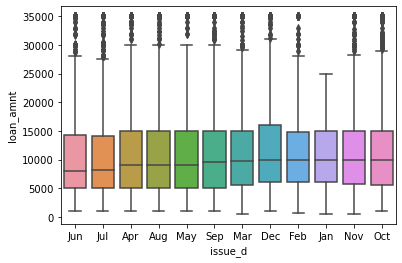

In [42]:
loan_amount_df=loan_df[['issue_d','loan_amnt']]
loan_amount_df['issue_d']=loan_amount_df['issue_d'].str[0:3].str.strip()
sorted_nb = loan_amount_df.groupby(['issue_d'])['loan_amnt'].median().sort_values()
sns.boxplot(x=loan_amount_df['issue_d'], y=loan_amount_df['loan_amnt'], order=list(sorted_nb.index))